# Clustering E-Commerce Customer Behavior - Using K-Means Clustering Algorithms

## Importing the libraries

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [25]:
dataset = pd.read_csv('customer_data.csv')
x_2d = dataset.iloc[:, [3,11]].values
x_3d = dataset.iloc[:, [1,3,11]].values
x_11d = dataset.iloc[:, 1:].values

In [26]:
print(x_2d)

[[40682     6]
 [15317     6]
 [38849     6]
 ...
 [13222     5]
 [40093     5]
 [22249     6]]


In [27]:
print(x_3d)

[[   27 40682     6]
 [   29 15317     6]
 [   37 38849     6]
 ...
 [   29 13222     5]
 [   31 40093     5]
 [   35 22249     6]]


In [28]:
print(x_11d)

[[27 'Male' 40682 ... 'Books' 0 6]
 [29 'Male' 15317 ... 'Clothing' 1 6]
 [37 'Male' 38849 ... 'Clothing' 0 6]
 ...
 [29 'Male' 13222 ... 'Clothing' 0 5]
 [31 'Female' 40093 ... 'Health' 1 5]
 [35 'Female' 22249 ... 'Health' 0 6]]


## Clustering using only 2 features

### Using the elbow method to find the optimal number of clusters

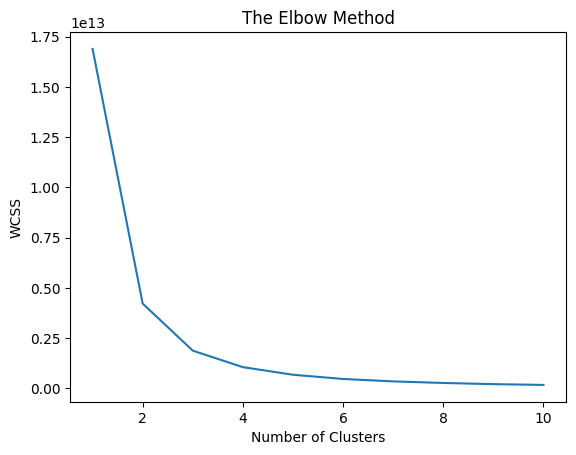

In [29]:
from sklearn.cluster import KMeans
WCSS = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state=42)
  kmeans.fit(x_2d)
  WCSS.append(kmeans.inertia_)

plt.plot(range(1, 11), WCSS)
plt.title('The Elbow Method')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

#### Therefore the optimun number of cluster is 3

### Training the K-means model on the dataset

In [30]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(x_2d)
print(y_kmeans)

[1 0 1 ... 0 1 2]


### Visualising the Clusters using 2D Cluster Plot

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


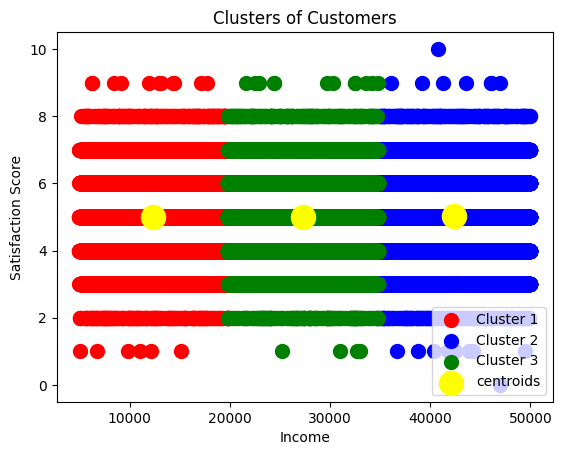

In [31]:
plt.scatter(x_2d[y_kmeans == 0,0], x_2d[y_kmeans == 0,1], s = 100, c = 'red', label='Cluster 1')
plt.scatter(x_2d[y_kmeans == 1,0], x_2d[y_kmeans == 1,1], s = 100, c = 'blue', label='Cluster 2')
plt.scatter(x_2d[y_kmeans == 2,0], x_2d[y_kmeans == 2,1], s = 100, c = 'green', label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='centroids')
plt.title('Clusters of Customers')
plt.xlabel('Income')
plt.ylabel('Satisfaction Score')
plt.legend()
plt.show()

## Clustering using 3 features

### Using the elbow method to find the optimum number of clusters

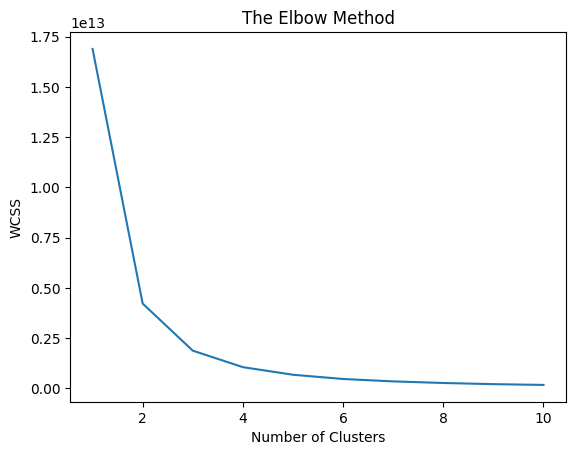

In [32]:
from sklearn.cluster import KMeans
WCSS = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state=42)
  kmeans.fit(x_3d)
  WCSS.append(kmeans.inertia_)

plt.plot(range(1, 11), WCSS)
plt.title('The Elbow Method')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

#### Therefore the optimum number of clusters is 3

### Training the K-means model on the dataset

In [33]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(x_3d)
print(y_kmeans)

[1 0 1 ... 0 1 2]


### Visualising the Clusters using 3D Cluster Plot

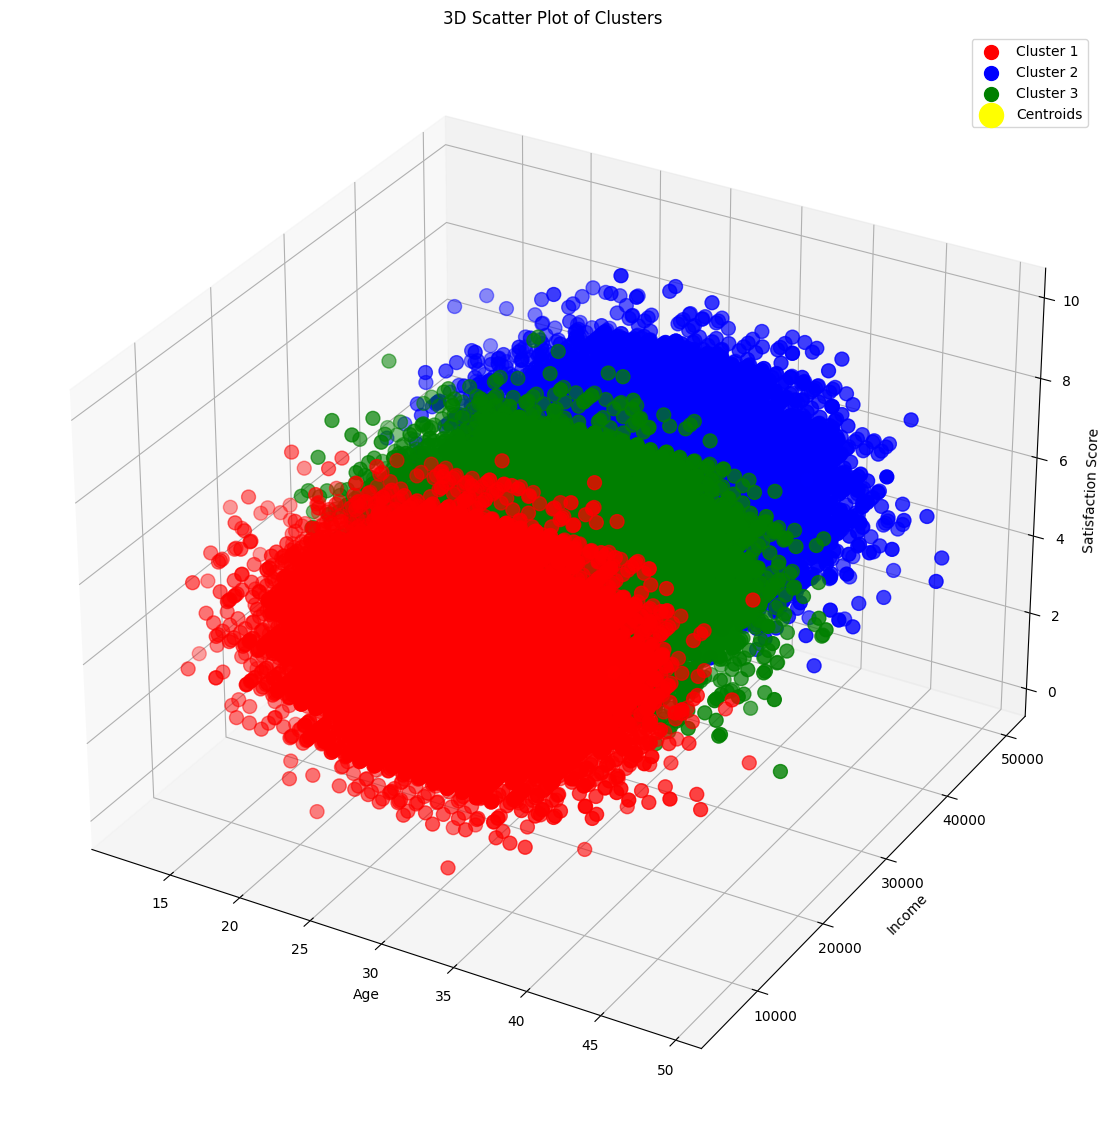

In [34]:
from mpl_toolkits.mplot3d import Axes3D

# Create a figure for 3D plotting
fig = plt.figure(figsize=(14, 16))

# Add a 3D subplot
ax = fig.add_subplot(111, projection='3d')

# Plot the clusters with different colors
ax.scatter(x_3d[y_kmeans == 0, 0], x_3d[y_kmeans == 0, 1], x_3d[y_kmeans == 0, 2], s=100, c='red', label='Cluster 1')
ax.scatter(x_3d[y_kmeans == 1, 0], x_3d[y_kmeans == 1, 1], x_3d[y_kmeans == 1, 2], s=100, c='blue', label='Cluster 2')
ax.scatter(x_3d[y_kmeans == 2, 0], x_3d[y_kmeans == 2, 1], x_3d[y_kmeans == 2, 2], s=100, c='green', label='Cluster 3')

# Plot the centroids in yellow (cluster centers)
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2],
           s=300, c='yellow', label='Centroids')

# Set plot titles and labels
ax.set_title('3D Scatter Plot of Clusters')
ax.set_xlabel('Age')
ax.set_ylabel('Income')
ax.set_zlabel('Satisfaction Score')

# Add a legend
ax.legend()

# Show the plot
plt.show()

## Clustering using 11 features

### Encoding Categorical Data

#### Encoding gender, region and product category column using Binary encoding

In [35]:
pip install category_encoders

In [36]:
import category_encoders as ce


# Convert x_11d to DataFrame and assign column names
df_x_11d = pd.DataFrame(x_11d, columns=['age','gender','income','education','region', 'loyalty_status','purchase_frequency','purchase_amount','product_category','promotion_usage','satisfaction_score'])
# Initialize Binary Encoder
binary_encoder = ce.BinaryEncoder(cols=['gender', 'region', 'product_category'])

# Fit and transform the data
x_11d = binary_encoder.fit_transform(df_x_11d)

# Display the encoded DataFrame
print(x_11d[['gender_0', 'region_0', 'product_category_0']])

       gender_0  region_0  product_category_0
0             0         0                   0
1             0         0                   0
2             0         0                   0
3             0         0                   0
4             1         1                   0
...         ...       ...                 ...
99995         1         0                   1
99996         0         0                   1
99997         0         0                   0
99998         1         0                   1
99999         1         0                   1

[100000 rows x 3 columns]


#### Encoding education, loyalty_status and purchase frequency columns using ordinal encoding

In [37]:
from sklearn.preprocessing import OrdinalEncoder

# Defining the order of the categories for education, loyalty_status and purchase_frequency column
education_order = ["HighSchool", "College", "Bachelor", "Masters"]
loyalty_status_order = ["Regular", "Silver", "Gold"]
purchase_frequency_order = ["rare", "frequent", "occasional"]

# Initializing OrdinalEncoder with the predefined order for education column
education_encoder = OrdinalEncoder(categories=[education_order])
loyalty_status_encoder = OrdinalEncoder(categories=[loyalty_status_order])
purchase_frequency_encoder = OrdinalEncoder(categories=[purchase_frequency_order])

# Applying the encoder to the 'Education' column
x_11d['education_encoded'] = education_encoder.fit_transform(x_11d[['education']])
x_11d['loyalty_status_encoded'] = loyalty_status_encoder.fit_transform(x_11d[['loyalty_status']])
x_11d['purchase_frequency_encoded'] = purchase_frequency_encoder.fit_transform(x_11d[['purchase_frequency']])

In [38]:
print(x_11d)

      age  gender_0  gender_1 income   education  region_0  region_1  \
0      27         0         1  40682    Bachelor         0         0   
1      29         0         1  15317     Masters         0         1   
2      37         0         1  38849    Bachelor         0         1   
3      30         0         1  11568  HighSchool         0         1   
4      31         1         0  46952     College         1         0   
...    ..       ...       ...    ...         ...       ...       ...   
99995  31         1         0  19691     College         0         1   
99996  36         0         1  17428  HighSchool         0         1   
99997  29         0         1  13222     College         0         1   
99998  31         1         0  40093    Bachelor         0         1   
99999  35         1         0  22249     College         0         1   

       region_2 loyalty_status purchase_frequency purchase_amount  \
0             1           Gold           frequent           18249 

In [39]:
x_11d_encoded = x_11d.drop(["education", "loyalty_status", "purchase_frequency"], axis=1)
print(x_11d_encoded)

      age  gender_0  gender_1 income  region_0  region_1  region_2  \
0      27         0         1  40682         0         0         1   
1      29         0         1  15317         0         1         0   
2      37         0         1  38849         0         1         0   
3      30         0         1  11568         0         1         1   
4      31         1         0  46952         1         0         0   
...    ..       ...       ...    ...       ...       ...       ...   
99995  31         1         0  19691         0         1         0   
99996  36         0         1  17428         0         1         1   
99997  29         0         1  13222         0         1         0   
99998  31         1         0  40093         0         1         0   
99999  35         1         0  22249         0         1         0   

      purchase_amount  product_category_0  product_category_1  \
0               18249                   0                   0   
1                4557        

### Applying PCA for reducing the dimensions to two features

In [40]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
x_pca_2d = pca.fit_transform(x_11d_encoded)

In [41]:
print(x_pca_2d)

[[ 15287.48101698   3719.40496111]
 [-13194.81384695   -709.24814266]
 [ 11412.14244848  -1725.58988287]
 ...
 [-14970.54659218    551.63377328]
 [ 14085.05308326   2090.58420578]
 [ -5034.24044637   1563.37737194]]


### Applying PCA for reducing the dimensions to three features

In [43]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
x_pca_3d = pca.fit_transform(x_11d_encoded)

In [44]:
print(x_pca_3d)

[[ 1.52874810e+04  3.71940496e+03 -2.99584109e+00]
 [-1.31948138e+04 -7.09248143e+02 -1.01204148e+00]
 [ 1.14121424e+04 -1.72558988e+03  7.00942870e+00]
 ...
 [-1.49705466e+04  5.51633773e+02 -1.01620146e+00]
 [ 1.40850531e+04  2.09058421e+03  1.00207380e+00]
 [-5.03424045e+03  1.56337737e+03  4.99003140e+00]]


### Applying clustering on data after performing 2-dimensional PCA

#### Using the elbow method to find the optimum number of clusters

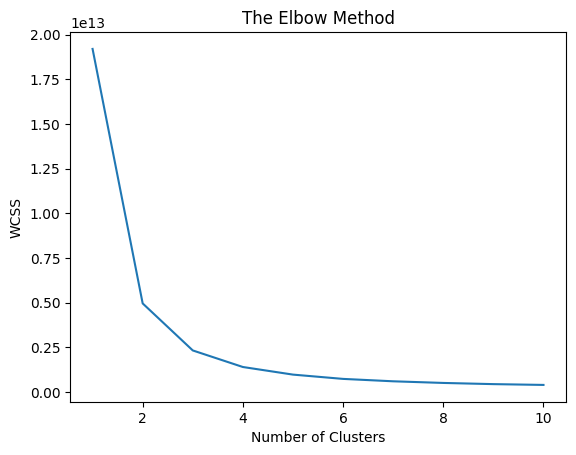

In [46]:
from sklearn.cluster import KMeans
WCSS = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state=42)
  kmeans.fit(x_pca_2d)
  WCSS.append(kmeans.inertia_)

plt.plot(range(1, 11), WCSS)
plt.title('The Elbow Method')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

##### Therefore the optimal number of clusters is 3

#### Training the K-means model on the PCA applied 2 dimensional dataset

In [47]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(x_pca_2d)
print(y_kmeans)

[1 0 1 ... 0 1 2]


#### Visualising the clusters using 2D scatter plot

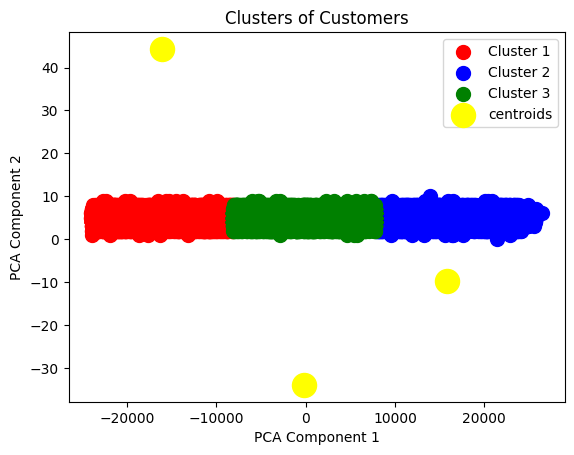

In [52]:
plt.scatter(x_pca_2d[y_kmeans == 0,0], x_2d[y_kmeans == 0,1], s = 100, c = 'red', label='Cluster 1')
plt.scatter(x_pca_2d[y_kmeans == 1,0], x_2d[y_kmeans == 1,1], s = 100, c = 'blue', label='Cluster 2')
plt.scatter(x_pca_2d[y_kmeans == 2,0], x_2d[y_kmeans == 2,1], s = 100, c = 'green', label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='centroids')
plt.title('Clusters of Customers')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

### Applying clustering on the data after performing 3-dimensional PCA

#### Using the elbow method to find the optimum number of clusters

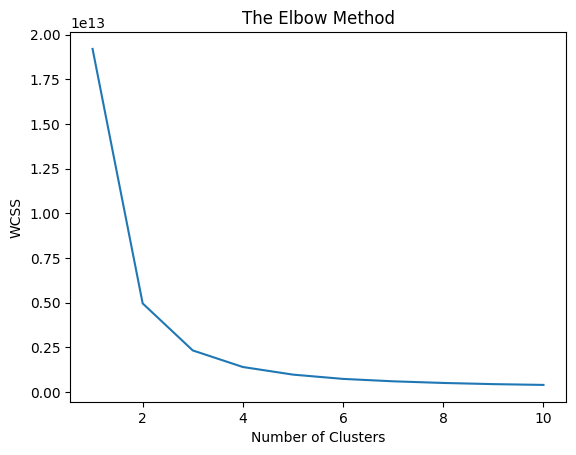

In [49]:
from sklearn.cluster import KMeans
WCSS = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state=42)
  kmeans.fit(x_pca_3d)
  WCSS.append(kmeans.inertia_)

plt.plot(range(1, 11), WCSS)
plt.title('The Elbow Method')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

##### Therefore the optimum number of clusters is 3

#### Training the K-means model on the PCA applied 3-dimensional data

In [50]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(x_pca_3d)
print(y_kmeans)

[1 0 1 ... 0 1 2]


#### Visualising the clusters using 3D scatter plots

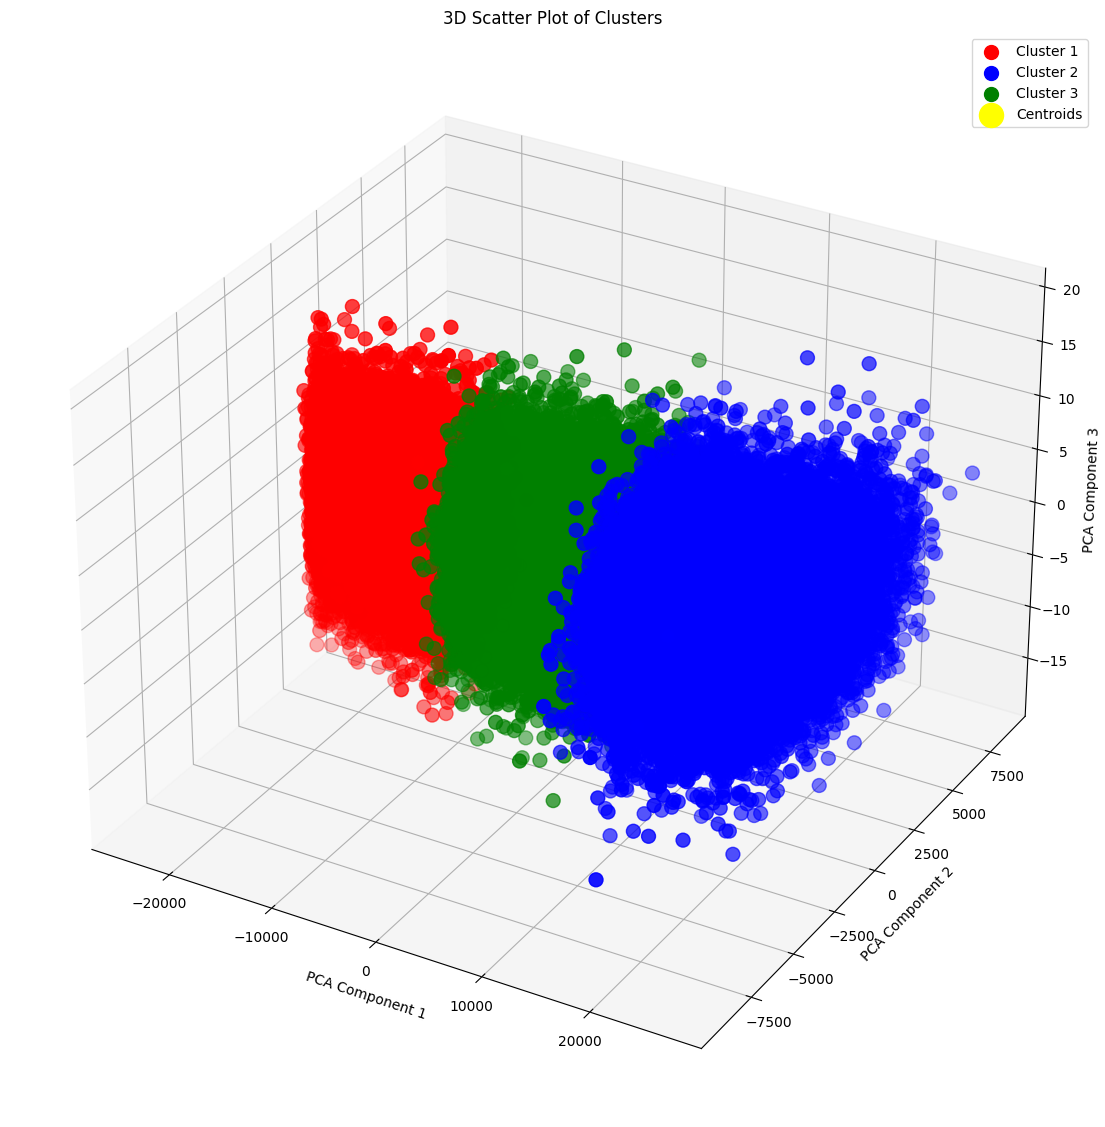

In [53]:
from mpl_toolkits.mplot3d import Axes3D

# Create a figure for 3D plotting
fig = plt.figure(figsize=(14, 16))

# Add a 3D subplot
ax = fig.add_subplot(111, projection='3d')

# Plot the clusters with different colors
ax.scatter(x_pca_3d[y_kmeans == 0, 0], x_pca_3d[y_kmeans == 0, 1], x_pca_3d[y_kmeans == 0, 2], s=100, c='red', label='Cluster 1')
ax.scatter(x_pca_3d[y_kmeans == 1, 0], x_pca_3d[y_kmeans == 1, 1], x_pca_3d[y_kmeans == 1, 2], s=100, c='blue', label='Cluster 2')
ax.scatter(x_pca_3d[y_kmeans == 2, 0], x_pca_3d[y_kmeans == 2, 1], x_pca_3d[y_kmeans == 2, 2], s=100, c='green', label='Cluster 3')

# Plot the centroids in yellow (cluster centers)
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2],
           s=300, c='yellow', label='Centroids')

# Set plot titles and labels
ax.set_title('3D Scatter Plot of Clusters')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')

# Add a legend
ax.legend()

# Show the plot
plt.show()